<a href="https://colab.research.google.com/github/jarusgnuj/ai-ml-wksh/blob/master/notebooks/image_classification/2_keras_mnist_feed_forward_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST dataset

The MNIST dataset consists of images of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. 

![](https://github.com/jarusgnuj/ai-ml-wksh/blob/master/data/image_classification/figures/Mnist-database-hand-written-digits.png?raw=true)

### Downloading dataset

In [3]:
!pip install -U tensorflow_datasets

import tensorflow_datasets as input_data
import tensorflow as tf

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import classification_report, confusion_matrix


# Import Fashion MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.2)
11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


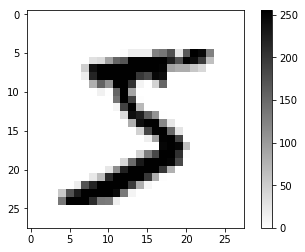

In [4]:
# view single data example

plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Normalise

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 
               'Six',      'Seven',   'Eight',  'Nine']

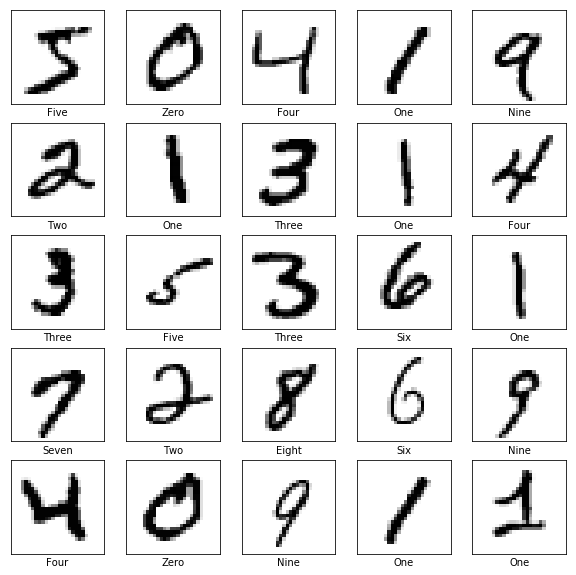

In [6]:
# View Data
plt.figure(figsize=(10,10))           
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Define Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
model.summary()

W0610 11:01:18.496376 140453303879552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Compile Model


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [11]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4754 - acc: 0.8863
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.1828 - acc: 0.9478
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1404 - acc: 0.9600
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.1171 - acc: 0.9664
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1004 - acc: 0.9709


In [12]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9683


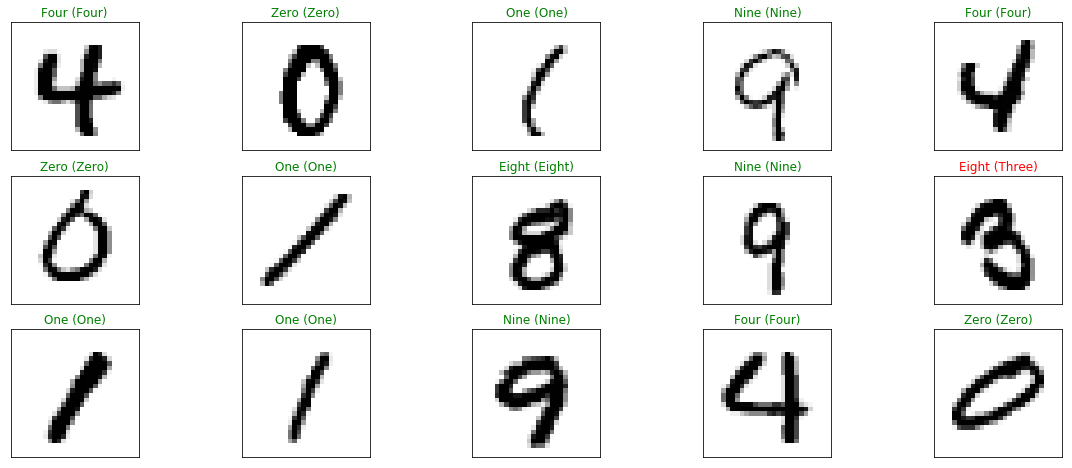

In [14]:

# Plot a random sample of 15 test images, their predicted labels and ground truth

y_hat = model.predict(x_test)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]), cmap=plt.cm.binary)
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

In [0]:


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [0]:



confusion = confusion_matrix(y_test, np.argmax(y_hat,axis=1))


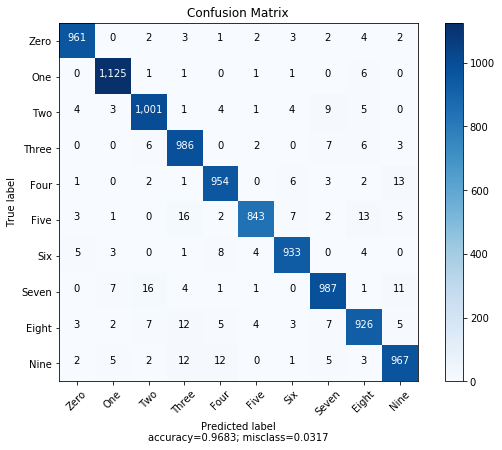

In [24]:
plot_confusion_matrix(confusion, 
                      normalize    = False,
                      target_names = class_names,
                      title        = "Confusion Matrix")